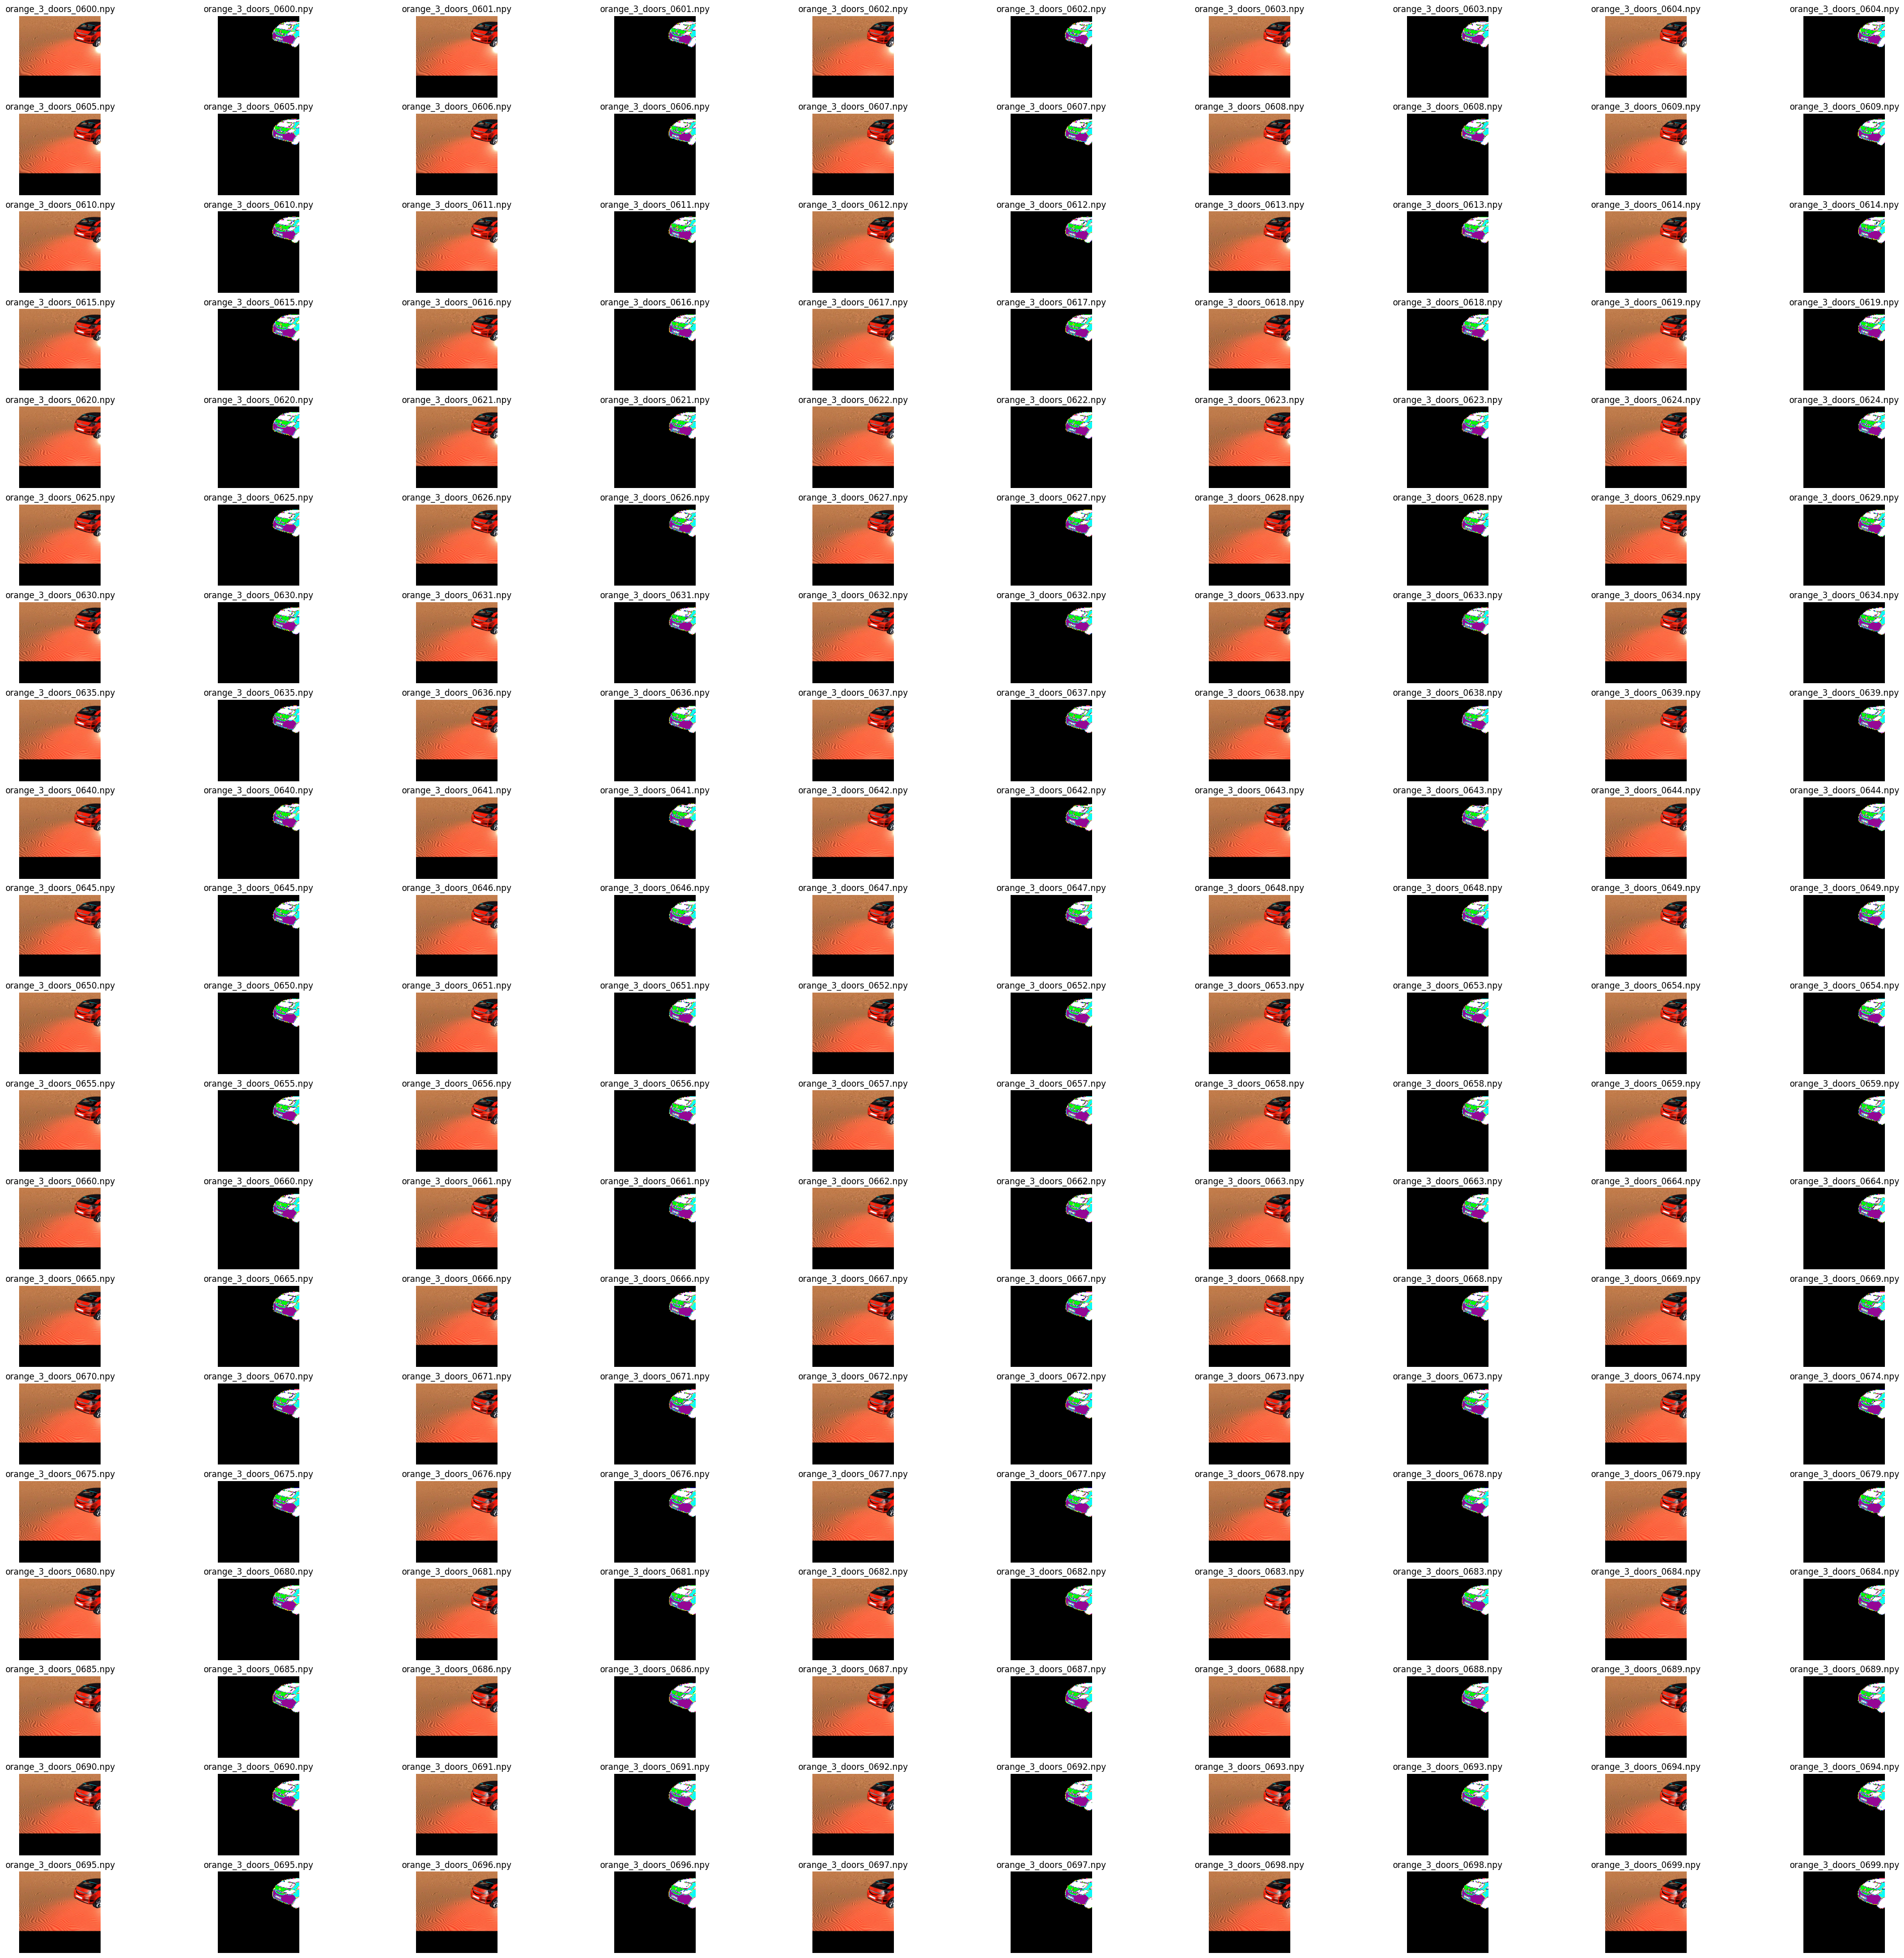

In [6]:
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

colors_info = {
    0:  (0,0,0),            # background to black
    10: (250, 149, 10),     # orange
    20: (19, 98, 19),       # dark green
    30: (249, 249, 10),     # yellow
    40: (10, 248, 250),     # cyan
    50: (149, 7, 149),      # purple
    60: (5, 249, 9),        # light green
    70: (20, 19, 249),      # blue
    80: (249, 9, 250),      # pink
    90: 'white'              # no color (NA)
}

# Convert RGB values to floats between 0 and 1
colors_info = {key: value if isinstance(value, str) else (value[0] / 255, value[1] / 255, value[2] / 255) for key, value in colors_info.items()}
# Create a custom colormap
carseg_cmap = ListedColormap(colors_info.values(), name="custom_cmap")

# write here the path to the arrrays
data_dir = r"carseg_data/arrays"


def fetch_images(data_dir, image_name, batch_size):
    orange_3_doors_files = [
        filename for filename in os.listdir(data_dir)
        if filename.startswith(image_name) and filename.endswith('.npy')
    ]
    for i in range(0, len(orange_3_doors_files), batch_size):
        batch_files = orange_3_doors_files[i:i + batch_size]
        batch_images = [np.load(os.path.join(data_dir, filename)) for filename in batch_files]
        image_data = [array[:, :, :3] for array in batch_images]
        mask_data = [array[:, :, 3] for array in batch_images]
        yield zip(batch_files, image_data, mask_data)

batch_size = 100
imageName = "orange_3_doors_06" #0-500 1300-2001
gen = fetch_images(data_dir, imageName, batch_size)

for batch in gen:
    fig, axes = plt.subplots(20, 10, figsize=(50, 50))
    for i, (ax1, ax2) in enumerate(axes.reshape(-1, 2)):
        file_name, image, mask = next(batch, (None, None, None))
        if file_name is not None:
            ax1.imshow(image)
            ax1.set_title(f"{file_name}")
            ax1.axis("off")  
            ax2.imshow(mask, cmap=carseg_cmap)  
            ax2.set_title(f"{file_name}")
            ax2.axis("off") 

    plt.show()